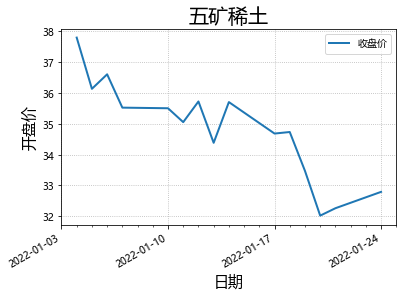

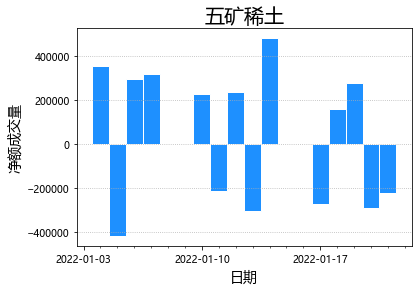

In [119]:
import tushare as ts

pro = ts.pro_api()

#查询当前所有正常上市交易的股票列表

# data = pro.stock_basic(exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')
# print(data)
from matplotlib import pyplot as plt
from matplotlib import dates
from matplotlib import rc
import numpy as np
rc("font",family='Microsoft YaHei')

import pandas as pd
df = pro.daily(ts_code='000831.SZ', start_date='2022-01-01')
df["trade_date"] = pd.to_datetime(df["trade_date"])
trade_date,close,vol=df["trade_date"],df["close"],df["vol"]
plt.title("五矿稀土",fontdict={"fontsize":20})
plt.xlabel("日期",fontdict={"fontsize":15})
plt.ylabel("开盘价",fontdict={"fontsize":15})
plt.grid(linestyle=":")
ax = plt.gca()
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=dates.MO))
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_minor_locator(dates.DayLocator())
plt.tick_params(labelsize=10)

plt.plot(trade_date,close,linestyle='-',linewidth=2,label="收盘价")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


diff_closing_price=np.diff(close)
sign_closing_prices = np.sign(diff_closing_price)
obvs = vol[1:] * sign_closing_prices
plt.title('五矿稀土', fontsize=20)
plt.xlabel('日期', fontsize=14)
plt.ylabel('净额成交量', fontsize=14)
ax = plt.gca()
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=dates.MO))
ax.xaxis.set_minor_locator(dates.DayLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m-%d'))
plt.tick_params(labelsize=10)
plt.grid(axis='y', linestyle=':')
plt.bar(trade_date[1:], obvs, 1.0, color='dodgerblue',edgecolor='white', label='OBV')
plt.show()


